In [ ]:
!unzip '/content/Flowers-Dataset.zip'

Archive:  /content/Flowers-Dataset.zip
  inflating: flowers/daisy/100080576_f52e8ee070_n.jpg  
  inflating: flowers/daisy/10140303196_b88d3d6cec.jpg  
  inflating: flowers/daisy/10172379554_b296050f82_n.jpg  
  inflating: flowers/daisy/10172567486_2748826a8b.jpg  
  inflating: flowers/daisy/10172636503_21bededa75_n.jpg  
  inflating: flowers/daisy/102841525_bd6628ae3c.jpg  
  inflating: flowers/daisy/10300722094_28fa978807_n.jpg  
  inflating: flowers/daisy/1031799732_e7f4008c03.jpg  
  inflating: flowers/daisy/10391248763_1d16681106_n.jpg  
  inflating: flowers/daisy/10437754174_22ec990b77_m.jpg  
  inflating: flowers/daisy/10437770546_8bb6f7bdd3_m.jpg  
  inflating: flowers/daisy/10437929963_bc13eebe0c.jpg  
  inflating: flowers/daisy/10466290366_cc72e33532.jpg  
  inflating: flowers/daisy/10466558316_a7198b87e2.jpg  
  inflating: flowers/daisy/10555749515_13a12a026e.jpg  
  inflating: flowers/daisy/10555815624_dc211569b0.jpg  
  inflating: flowers/daisy/10555826524_423eb8bf71_n.jpg 

# ● Download the Dataset

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import os

In [ ]:
batch_size = 16

# ● Image Augmentation

In [ ]:
data_aug = Sequential(
  [
    layers.RandomFlip("horizontal",input_shape=(180, 180, 3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

In [ ]:
os.listdir("/content/flowers")

['daisy', 'rose', 'dandelion', 'tulip', 'sunflower']

In [ ]:
train_data = tf.keras.utils.image_dataset_from_directory(
  "/content/flowers",
  validation_split=0.25,
  subset="training",
  seed=120,
  image_size=(180, 180),
  batch_size=batch_size)

Found 4317 files belonging to 5 classes.
Using 3238 files for training.


In [ ]:
val_data_set = tf.keras.utils.image_dataset_from_directory(
 "",
  validation_split=0.25,
  subset="validation",
  seed=120,
  image_size=(180, 180),
  batch_size=batch_size)

Found 4317 files belonging to 1 classes.
Using 1079 files for validation.


In [ ]:
class_names = train_data.class_names

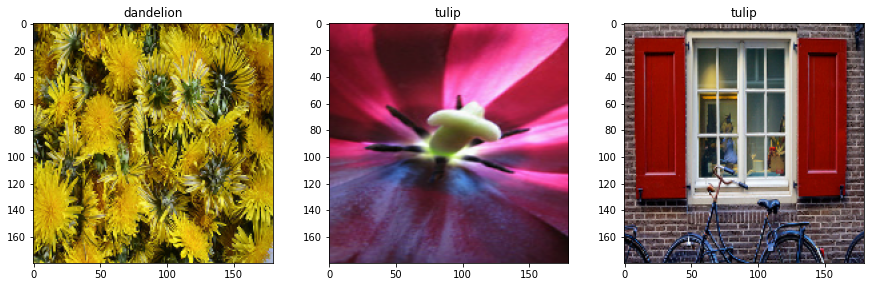

In [ ]:
plt.figure(figsize=(15, 15))
for images, labels in train_data.take(1):
  for i in range(3):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])

In [ ]:
normalization_layer = layers.Rescaling(1./255)

In [ ]:
dataset_normalized = train_data.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(dataset_normalized))
first_image = image_batch[0]
print(np.min(first_image), np.max(first_image))

0.0062093404 1.0


# ● Create Model

# ● Add Layers (Convolution,MaxPooling,Flatten,Dense-(Hidden Layers),Output)

In [ ]:
num_classes = len(class_names)

model = Sequential([
  data_aug,
  layers.Rescaling(1./255, input_shape=(180, 180, 3)),
  layers.Conv2D(16, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3,activation='relu'),
  layers.Conv2D(32, 3,activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

# ● Compile The Model

In [ ]:
# compiling model with categorical cross entropy and adam optimizer
model.compile(optimizer='adam',
loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
metrics=['accuracy'])

# ● Fit The Model

In [ ]:
epochs=10
history = model.fit(train_data,validation_data=val_data_set,epochs=epochs)

NameError: ignored

In [ ]:
epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.plot(epochs_range, history.history['accuracy'], label='Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

NameError: ignored

<Figure size 576x576 with 0 Axes>

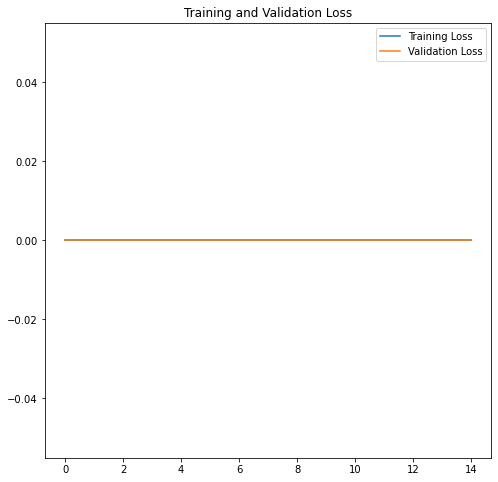

In [ ]:
plt.figure(figsize=(8, 8))
plt.plot(epochs_range, history.history['loss'], label='Training Loss')
plt.plot(epochs_range, history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

# ● Save The Model

In [ ]:
model.save("./flowers.h5")

In [ ]:
model.load_weights('./flowers.h5')

# ● Test The Model

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

In [ ]:
img=image.load_img('/content/Sunflower.jpg',target_size=(70,70))
img

FileNotFoundError: ignored